In [98]:
import pandas as pd

In [99]:
#vac_data = pd.read_csv("OxCGRT_vaccines_full.csv")
#latest_data = pd.read_csv("OxCGRT_nat_latest.csv")
combined_data = pd.read_csv("OxCGRT_nat_latest_combined.csv")
#response_data = pd.read_csv("OxCGRT_nat_latest_responses.csv")

C:\Users\Chris\AppData\Local\Temp\ipykernel_25596\3464687837.py:3: DtypeWarning: Columns (2,3,23,44) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_data = pd.read_csv("OxCGRT_nat_latest_combined.csv")


In [100]:
#print(latest_data.columns)

 'C1M_School closing', 'C1M_Flag',
       'C2M_Workplace closing', 'C2M_Flag', 'C3M_Cancel public events',
       'C3M_Flag', 'C4M_Restrictions on gatherings', 'C4M_Flag',
       'C5M_Close public transport', 'C5M_Flag',
       'C6M_Stay at home requirements', 'C6M_Flag',
       'C7M_Restrictions on internal movement', 'C7M_Flag',
       'C8EV_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'H6M_Facial Coverings', 'H6M_Flag', 'H7_Vaccination policy', 'H7_Flag',
       'H8M_Protection of elderly people', 'H8M_Flag', 'M1_Wildcard',
       'V1_Vaccine Prioritisation (summary)',
       'V2A_Vaccine Availability (summary)',
       'V2B_Vaccine age eligibility/availability age floor (general population summary)',
       'V2C_Vaccine age eligibility/availability age floor (at risk summary)',
       'V2D_Medically/ clinically vulnerable (Non-elderly)', 'V2E_Education',
       'V2F_Frontline workers  (non healthcare)',
       'V2G_Frontline workers  (healthcare)',
       'V3_Vaccine Financial Support (summary)',
       'V4_Mandatory Vaccination (summary)',

In [101]:
print(combined_data.columns)

Index(['CountryName', 'CountryCode', 'RegionName', 'RegionCode',
       'Jurisdiction', 'Date', 'C1M_combined_numeric', 'C1M_combined',
       'C2M_combined_numeric', 'C2M_combined', 'C3M_combined_numeric',
       'C3M_combined', 'C4M_combined_numeric', 'C4M_combined',
       'C5M_combined_numeric', 'C5M_combined', 'C6M_combined_numeric',
       'C6M_combined', 'C7M_combined_numeric', 'C7M_combined',
       'C8EV_combined_numeric', 'C8EV_combined', 'E1_combined_numeric',
       'E1_combined', 'E2_combined_numeric', 'E2_combined',
       'H1_combined_numeric', 'H1_combined', 'H2_combined_numeric',
       'H2_combined', 'H3_combined_numeric', 'H3_combined',
       'H6M_combined_numeric', 'H6M_combined', 'H7_combined_numeric',
       'H7_combined', 'H8M_combined_numeric', 'H8M_combined', 'V1 (summary)',
       'V2 (summary)', 'V3 (summary)', 'V4 (summary)', 'ConfirmedCases',
       'ConfirmedDeaths', 'MajorityVaccinated', 'PopulationVaccinated',
       'StringencyIndex_Average', 'Stringen

In [102]:
# Taking data starting April 1st, 2020 since earlier months has many missing data
temp = combined_data.loc[(combined_data["Date"]>20200331) & (combined_data["Date"]<20230101)]


In [103]:
df = temp.drop(["RegionName", "RegionCode", "Jurisdiction"], axis=1)
display(df.head())

,CountryName,CountryCode,Date,C1M_combined_numeric,C1M_combined,C2M_combined_numeric,C2M_combined,C3M_combined_numeric,C3M_combined,C4M_combined_numeric,...,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,StringencyIndex_Average_ForDisplay,GovernmentResponseIndex_Average,GovernmentResponseIndex_Average_ForDisplay,ContainmentHealthIndex_Average,ContainmentHealthIndex_Average_ForDisplay,EconomicSupportIndex,EconomicSupportIndex_ForDisplay
91,Aruba,ABW,20200401,3.0,3G,3.0,3G,2.0,2G,4.0,...,NV,0.0,85.19,85.19,70.31,70.31,67.86,67.86,87.5,87.5
92,Aruba,ABW,20200402,3.0,3G,3.0,3G,2.0,2G,4.0,...,NV,0.0,85.19,85.19,70.31,70.31,67.86,67.86,87.5,87.5
93,Aruba,ABW,20200403,3.0,3G,3.0,3G,2.0,2G,4.0,...,NV,0.0,85.19,85.19,70.31,70.31,67.86,67.86,87.5,87.5
94,Aruba,ABW,20200404,3.0,3G,3.0,3G,2.0,2G,4.0,...,NV,0.0,85.19,85.19,70.31,70.31,67.86,67.86,87.5,87.5
95,Aruba,ABW,20200405,3.0,3G,3.0,3G,2.0,2G,4.0,...,NV,0.0,85.19,85.19,70.31,70.31,67.86,67.86,87.5,87.5


In [104]:
# Change to date format and get year
df["Date"] = pd.to_datetime(df["Date"], format='%Y%m%d')
df["Year"] = df["Date"].dt.year
df.head()

,CountryName,CountryCode,Date,C1M_combined_numeric,C1M_combined,C2M_combined_numeric,C2M_combined,C3M_combined_numeric,C3M_combined,C4M_combined_numeric,...,PopulationVaccinated,StringencyIndex_Average,StringencyIndex_Average_ForDisplay,GovernmentResponseIndex_Average,GovernmentResponseIndex_Average_ForDisplay,ContainmentHealthIndex_Average,ContainmentHealthIndex_Average_ForDisplay,EconomicSupportIndex,EconomicSupportIndex_ForDisplay,Year
91,Aruba,ABW,2020-04-01,3.0,3G,3.0,3G,2.0,2G,4.0,...,0.0,85.19,85.19,70.31,70.31,67.86,67.86,87.5,87.5,2020
92,Aruba,ABW,2020-04-02,3.0,3G,3.0,3G,2.0,2G,4.0,...,0.0,85.19,85.19,70.31,70.31,67.86,67.86,87.5,87.5,2020
93,Aruba,ABW,2020-04-03,3.0,3G,3.0,3G,2.0,2G,4.0,...,0.0,85.19,85.19,70.31,70.31,67.86,67.86,87.5,87.5,2020
94,Aruba,ABW,2020-04-04,3.0,3G,3.0,3G,2.0,2G,4.0,...,0.0,85.19,85.19,70.31,70.31,67.86,67.86,87.5,87.5,2020
95,Aruba,ABW,2020-04-05,3.0,3G,3.0,3G,2.0,2G,4.0,...,0.0,85.19,85.19,70.31,70.31,67.86,67.86,87.5,87.5,2020


In [105]:
df2 = df[['CountryName','CountryCode', 'Date', 'Year', 'ConfirmedCases',
       'ConfirmedDeaths', 'MajorityVaccinated', 'PopulationVaccinated',
       'StringencyIndex_Average_ForDisplay',
       'GovernmentResponseIndex_Average_ForDisplay',
       'ContainmentHealthIndex_Average_ForDisplay',
       'EconomicSupportIndex_ForDisplay']]

df2.head()

,CountryName,CountryCode,Date,Year,ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average_ForDisplay,GovernmentResponseIndex_Average_ForDisplay,ContainmentHealthIndex_Average_ForDisplay,EconomicSupportIndex_ForDisplay
91,Aruba,ABW,2020-04-01,2020,55.0,0.0,NV,0.0,85.19,70.31,67.86,87.5
92,Aruba,ABW,2020-04-02,2020,60.0,0.0,NV,0.0,85.19,70.31,67.86,87.5
93,Aruba,ABW,2020-04-03,2020,62.0,0.0,NV,0.0,85.19,70.31,67.86,87.5
94,Aruba,ABW,2020-04-04,2020,64.0,0.0,NV,0.0,85.19,70.31,67.86,87.5
95,Aruba,ABW,2020-04-05,2020,64.0,0.0,NV,0.0,85.19,70.31,67.86,87.5


In [106]:
df3 = df2.groupby(["CountryName", "CountryCode", "Year"])

In [107]:
df4_stats = df3["ConfirmedCases", "ConfirmedDeaths", "PopulationVaccinated"].max()
df4_stats.head(20)
#df4_stats.to_excel("general_stats.xlsx")

C:\Users\Chris\AppData\Local\Temp\ipykernel_25596\3608172580.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df4_stats = df3["ConfirmedCases", "ConfirmedDeaths", "PopulationVaccinated"].max()


ConfirmedCases  ConfirmedDeaths  \
CountryName CountryCode Year                                    
Afghanistan AFG         2020         52330.0           2189.0   
                        2021        158084.0           7356.0   
                        2022        207559.0           7849.0   
Albania     ALB         2020         58316.0           1181.0   
                        2021        210224.0           3217.0   
                        2022        333806.0           3595.0   
Algeria     DZA         2020         99610.0           2756.0   
                        2021        218432.0           6276.0   
                        2022        271228.0           6881.0   
Andorra     AND         2020          8049.0             84.0   
                        2021         23740.0            140.0   
                        2022         47751.0            165.0   
Angola      AGO         2020         17553.0            405.0   
                        2021         81593.0           1770.0   
                        2022        105095.0           1930.0   
Argentina   ARG         2020       1625514.0          43245.0   
                        2021       5654408.0         117169.0   
                        2022       9891139.0         130124.0   
Aruba       ABW         2020          5489.0             49.0   
                        2021         20461.0            181.0   

                              PopulationVaccinated  
CountryName CountryCode Year                        
Afghanistan AFG         2020                  0.00  
                        2021                  9.13  
                        2022                 26.15  
Albania     ALB         2020                  0.00  
                        2021                 36.28  
                        2022                 44.68  
Algeria     DZA         2020                  0.00  
                        2021                 12.49  
                        2022                 14.43  
Andorra     AND         2020                  0.00  
                        2021                 64.37  
                        2022                 66.99  
Angola      AGO         2020                  0.00  
                        2021                 11.04  
                        2022                 23.19  
Argentina   ARG         2020                  0.00  
                        2021                 67.62  
                        2022                 76.45  
Aruba       ABW         2020                  0.00  
                        2021                 74.21

In [108]:
df4_index = df3[[
       'StringencyIndex_Average_ForDisplay',
       'GovernmentResponseIndex_Average_ForDisplay',
       'ContainmentHealthIndex_Average_ForDisplay',
       'EconomicSupportIndex_ForDisplay']].mean()
#df4_index.to_excel("covid_index_scores.xlsx")

df4_index.head(20)

StringencyIndex_Average_ForDisplay  \
CountryName CountryCode Year                                       
Afghanistan AFG         2020                           50.400873   
                        2021                           29.242219   
                        2022                           11.415644   
Albania     ALB         2020                           66.484618   
                        2021                           48.590904   
                        2022                           21.522548   
Algeria     DZA         2020                           75.927345   
                        2021                           59.611589   
                        2022                           35.872055   
Andorra     AND         2020                           48.257455   
                        2021                           50.087534   
                        2022                           11.986110   
Angola      AGO         2020                           74.392036   
                        2021                           57.622137   
                        2022                           37.656849   
Argentina   ARG         2020                           87.617527   
                        2021                           66.841315   
                        2022                           19.031068   
Aruba       ABW         2020                           57.403782   
                        2021                           42.777753   

                              GovernmentResponseIndex_Average_ForDisplay  \
CountryName CountryCode Year                                               
Afghanistan AFG         2020                                   41.275527   
                        2021                                   24.306740   
                        2022                                   14.827370   
Albania     ALB         2020                                   63.669964   
                        2021                                   55.050986   
                        2022                                   27.499918   
Algeria     DZA         2020                                   61.964691   
                        2021                                   59.721370   
                        2022                                   37.823890   
Andorra     AND         2020                                   57.502618   
                        2021                                   62.595151   
                        2022                                   32.150411   
Angola      AGO         2020                                   54.910873   
                        2021                                   48.587452   
                        2022                                   41.235178   
Argentina   ARG         2020                                   76.753564   
                        2021                                   64.280274   
                        2022                                   33.759452   
Aruba       ABW         2020                                   54.337745   
                        2021                                   42.050356   

                              ContainmentHealthIndex_Average_ForDisplay  \
CountryName CountryCode Year                                              
Afghanistan AFG         2020                                  46.769891   
                        2021                                  27.781370   
                        2022                                  16.943863   
Albania     ALB         2020                                  64.499673   
                        2021                                  55.216329   
                        2022                                  30.274904   
Algeria     DZA         2020                                  64.143018   
                        2021                                  62.100164   
                        2022                                  42.521205   
Andorra     AND         2020       

In [109]:
df5 = pd.merge(df4_stats, df4_index, how='inner', on=['CountryName', 'CountryCode', 'Year'])
df5.head()

ConfirmedCases  ConfirmedDeaths  \
CountryName CountryCode Year                                    
Afghanistan AFG         2020         52330.0           2189.0   
                        2021        158084.0           7356.0   
                        2022        207559.0           7849.0   
Albania     ALB         2020         58316.0           1181.0   
                        2021        210224.0           3217.0   

                              PopulationVaccinated  \
CountryName CountryCode Year                         
Afghanistan AFG         2020                  0.00   
                        2021                  9.13   
                        2022                 26.15   
Albania     ALB         2020                  0.00   
                        2021                 36.28   

                              StringencyIndex_Average_ForDisplay  \
CountryName CountryCode Year                                       
Afghanistan AFG         2020                           50.400873   
                        2021                           29.242219   
                        2022                           11.415644   
Albania     ALB         2020                           66.484618   
                        2021                           48.590904   

                              GovernmentResponseIndex_Average_ForDisplay  \
CountryName CountryCode Year                                               
Afghanistan AFG         2020                                   41.275527   
                        2021                                   24.306740   
                        2022                                   14.827370   
Albania     ALB         2020                                   63.669964   
                        2021                                   55.050986   

                              ContainmentHealthIndex_Average_ForDisplay  \
CountryName CountryCode Year                                              
Afghanistan AFG         2020                                  46.769891   
                        2021                                  27.781370   
                        2022                                  16.943863   
Albania     ALB         2020                                  64.499673   
                        2021                                  55.216329   

                              EconomicSupportIndex_ForDisplay  
CountryName CountryCode Year                                   
Afghanistan AFG         2020                         2.818182  
                        2021                         0.000000  
                        2022                         0.000000  
Albania     ALB         2020                        57.863636  
                        2021                        53.904110

In [110]:
test = df.groupby(["CountryName", "CountryCode", "Year"])[
       'C2M_combined', 
       'C6M_combined', 'C8EV_combined',
       'E1_combined', 'E2_combined',
       'H2_combined',
       'H7_combined'].agg(pd.Series.mode)

#test.to_excel("covid_sample_indicators.xlsx")

test.head()

C:\Users\Chris\AppData\Local\Temp\ipykernel_25596\3332728180.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  test = df.groupby(["CountryName", "CountryCode", "Year"])[


C2M_combined C6M_combined C8EV_combined  \
CountryName CountryCode Year                                           
Afghanistan AFG         2020           3T           2T           1.0   
                        2021           2G            0           1.0   
                        2022           2T            0           0.0   
Albania     ALB         2020           2G           1G           1.0   
                        2021           1G           2G           1.0   

                             E1_combined E2_combined H2_combined H7_combined  
CountryName CountryCode Year                                                  
Afghanistan AFG         2020           0         0.0         1.0           0  
                        2021           0         0.0         1.0          1G  
                        2022           0         0.0         0.0          5G  
Albania     ALB         2020          1A         1.0         2.0           0  
                        2021          1A         1.0         2.0          2G

In [111]:
#test2 = df.groupby(["CountryName", "Year"])[
 #      'C2M_combined_numeric', 'C2M_combined', 
  #     'C6M_combined_numeric', 'C6M_combined', 'C8EV_combined_numeric', 'C8EV_combined', 'E1_combined_numeric',
   #    'E1_combined', 'E2_combined_numeric', 'E2_combined', 'H7_combined_numeric',
    #   'H7_combined'].agg(pd.Series.mode)

#test2.head()

In [112]:
df6 = pd.merge(df5.reset_index(), test.reset_index(), how='inner', on=['CountryName', 'CountryCode', 'Year'] )
df6.head(20)

,CountryName,CountryCode,Year,ConfirmedCases,ConfirmedDeaths,PopulationVaccinated,StringencyIndex_Average_ForDisplay,GovernmentResponseIndex_Average_ForDisplay,ContainmentHealthIndex_Average_ForDisplay,EconomicSupportIndex_ForDisplay,C2M_combined,C6M_combined,C8EV_combined,E1_combined,E2_combined,H2_combined,H7_combined
0,Afghanistan,AFG,2020,52330.0,2189.0,0.00,50.400873,41.275527,46.769891,2.818182,3T,2T,1.0,0,0.0,1.0,0
1,Afghanistan,AFG,2021,158084.0,7356.0,9.13,29.242219,24.306740,27.781370,0.000000,2G,0,1.0,0,0.0,1.0,1G
2,Afghanistan,AFG,2022,207559.0,7849.0,26.15,11.415644,14.827370,16.943863,0.000000,2T,0,0.0,0,0.0,0.0,5G
3,Albania,ALB,2020,58316.0,1181.0,0.00,66.484618,63.669964,64.499673,57.863636,2G,1G,1.0,1A,1.0,2.0,0
4,Albania,ALB,2021,210224.0,3217.0,36.28,48.590904,55.050986,55.216329,53.904110,1G,2G,1.0,1A,1.0,2.0,2G
5,Albania,ALB,2022,333806.0,3595.0,44.68,21.522548,27.499918,30.274904,8.082192,0,0,0.0,0,0.0,1.0,5G
6,Algeria,DZA,2020,99610.0,2756.0,0.00,75.927345,61.964691,64.143018,46.727273,2G,2T,4.0,0,2.0,1.0,0
7,Algeria,DZA,2021,218432.0,6276.0,12.49,59.611589,59.721370,62.100164,43.082192,1G,2T,4.0,1A,1.0,2.0,3G
8,Algeria,DZA,2022,271228.0,6881.0,14.43,35.872055,37.823890,42.521205,4.931507,2G,0,1.0,0,0.0,3.0,5G
9,Andorra,AND,2020,8049.0,84.0,0.00,48.257455,57.502618,52.290800,94.000000,2G,0,2.0,2A,2.0,3.0,0


In [113]:
df7 = df6.loc[(df6["CountryName"]== "Argentina") | (df6["CountryName"]=="Canada") | (df6["CountryName"]== "China")|(df6["CountryName"]== "Germany")]
df7.head(20)

,CountryName,CountryCode,Year,ConfirmedCases,ConfirmedDeaths,PopulationVaccinated,StringencyIndex_Average_ForDisplay,GovernmentResponseIndex_Average_ForDisplay,ContainmentHealthIndex_Average_ForDisplay,EconomicSupportIndex_ForDisplay,C2M_combined,C6M_combined,C8EV_combined,E1_combined,E2_combined,H2_combined,H7_combined
15,Argentina,ARG,2020,1625514.0,43245.0,0.00,87.617527,76.753564,77.005418,75.000000,2T,2T,4.0,1A,2.0,1.0,0
16,Argentina,ARG,2021,5654408.0,117169.0,67.62,66.841315,64.280274,67.112767,44.452055,2T,2T,4.0,1A,1.0,2.0,3G
17,Argentina,ARG,2022,9891139.0,130124.0,76.45,19.031068,33.759452,34.325781,29.794521,0,0,1.0,0,0.0,3.0,5G
90,Canada,CAN,2020,590249.0,15736.0,0.00,65.805873,62.319270,62.061073,64.123377,2G,1G,4.0,2F,1.0,2.0,0
91,Canada,CAN,2021,2223735.0,30320.0,85.90,58.355035,60.290380,64.322691,32.062133,1G,1G,4.0,1F,1.0,2.0,5G
92,Canada,CAN,2022,4505142.0,49238.0,91.80,22.749434,34.679932,35.182765,31.164384,0,0,1.0,0,1.0,1.0,5G
105,China,CHN,2020,93679.0,4733.0,0.00,71.347200,65.369091,69.248036,38.227273,1G,1G,4.0,1F,1.0,2.0,0
106,China,CHN,2021,115168.0,4890.0,84.68,71.183534,72.908055,74.396603,62.500000,1G,0,3.0,0,0.0,3.0,5G
107,China,CHN,2022,1956071.0,5549.0,89.35,71.085863,76.252329,78.214712,62.500000,1G,1G,3.0,0,0.0,3.0,5G
192,Germany,DEU,2020,1719737.0,33071.0,0.00,62.227309,58.715164,60.616873,45.409091,2T,0,3.0,2F,0.0,3.0,0


In [114]:
import matplotlib.pyplot as plt
import numpy as np

In [115]:
df2020 = df7.loc[df7["Year"]== 2020]
df2021 = df7.loc[df7["Year"]== 2021]
df2022 = df7.loc[df7["Year"]== 2022]

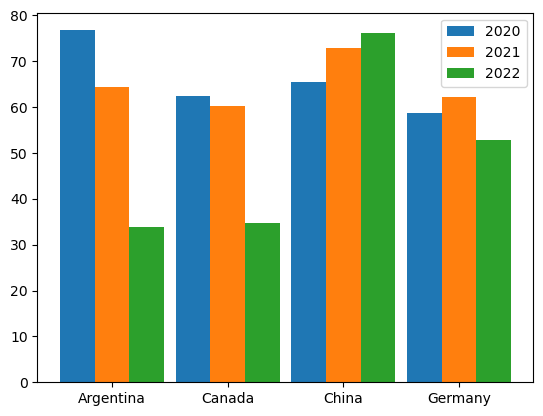

In [116]:
width = 0.3
i = np.arange(4)
plt.bar(i, df2020["GovernmentResponseIndex_Average_ForDisplay"], width, label="2020")
plt.bar(i + width, df2021["GovernmentResponseIndex_Average_ForDisplay"], width, label="2021")
plt.bar(i + (2*width), df2022["GovernmentResponseIndex_Average_ForDisplay"], width, label="2022")
plt.xticks(i + width,df2020["CountryName"].tolist())
plt.legend()
plt.show()

In [117]:

pop_data = pd.read_csv("WPP2022_Demographic_Indicators_Medium.csv")
pop_data.columns

C:\Users\Chris\AppData\Local\Temp\ipykernel_25596\112092785.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  pop_data = pd.read_csv("WPP2022_Demographic_Indicators_Medium.csv")


Index(['SortOrder', 'LocID', 'Notes', 'ISO3_code', 'ISO2_code', 'SDMX_code',
       'LocTypeID', 'LocTypeName', 'ParentID', 'Location', 'VarID', 'Variant',
       'Time', 'TPopulation1Jan', 'TPopulation1July', 'TPopulationMale1July',
       'TPopulationFemale1July', 'PopDensity', 'PopSexRatio', 'MedianAgePop',
       'NatChange', 'NatChangeRT', 'PopChange', 'PopGrowthRate',
       'DoublingTime', 'Births', 'Births1519', 'CBR', 'TFR', 'NRR', 'MAC',
       'SRB', 'Deaths', 'DeathsMale', 'DeathsFemale', 'CDR', 'LEx', 'LExMale',
       'LExFemale', 'LE15', 'LE15Male', 'LE15Female', 'LE65', 'LE65Male',
       'LE65Female', 'LE80', 'LE80Male', 'LE80Female', 'InfantDeaths', 'IMR',
       'LBsurvivingAge1', 'Under5Deaths', 'Q5', 'Q0040', 'Q0040Male',
       'Q0040Female', 'Q0060', 'Q0060Male', 'Q0060Female', 'Q1550',
       'Q1550Male', 'Q1550Female', 'Q1560', 'Q1560Male', 'Q1560Female',
       'NetMigrations', 'CNMR'],
      dtype='object')

In [118]:
p_df = pop_data.loc[pop_data["LocTypeName"]=="Country/Area"]
p_df.head()

,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,Location,...,Q0060Male,Q0060Female,Q1550,Q1550Male,Q1550Female,Q1560,Q1560Male,Q1560Female,NetMigrations,CNMR
3648,29,108,NaN,BDI,BI,108.0,4,Country/Area,910,Burundi,...,641.8547,595.1510,290.7911,308.1964,274.8946,423.9146,452.6005,397.8913,-13.343,-5.893
3649,29,108,NaN,BDI,BI,108.0,4,Country/Area,910,Burundi,...,640.8312,589.4012,288.3539,307.9939,270.3494,420.8717,452.3522,392.1761,-13.217,-5.721
3650,29,108,NaN,BDI,BI,108.0,4,Country/Area,910,Burundi,...,638.2902,587.9175,288.0273,307.0741,270.5827,420.4448,451.2164,392.4644,-13.715,-5.815
3651,29,108,NaN,BDI,BI,108.0,4,Country/Area,910,Burundi,...,634.7139,584.4393,286.2351,305.3711,268.7026,418.1934,449.0344,390.1690,-14.962,-6.216
3652,29,108,NaN,BDI,BI,108.0,4,Country/Area,910,Burundi,...,631.5888,580.1806,284.1157,303.6124,266.2347,415.5703,446.9088,387.0907,-14.599,-5.948


In [119]:
p_df2 = p_df[['Location', 'ISO3_code', 'Time', 'TPopulation1Jan']]
p_df2 = p_df2.loc[(p_df2['Time']>2020) & (p_df2['Time']<2024)].reset_index(drop=True)
p_df2.head()

,Location,ISO3_code,Time,TPopulation1Jan
0,Burundi,BDI,2021,12386.556
1,Burundi,BDI,2022,12715.870
2,Burundi,BDI,2023,13063.283
3,Comoros,COM,2021,814.006
4,Comoros,COM,2022,829.245


In [120]:
p_df3 = p_df2.rename(columns={"Location":"CountryName", "ISO3_code":"CountryCode" ,"Time":"Year", "TPopulation1Jan" : "Population"})
p_df3["Year"] = p_df3["Year"] - 1 #pop data is 1st Jan while covid data is 31st dec, so set year as 1 less
p_df3.head()

,CountryName,CountryCode,Year,Population
0,Burundi,BDI,2020,12386.556
1,Burundi,BDI,2021,12715.870
2,Burundi,BDI,2022,13063.283
3,Comoros,COM,2020,814.006
4,Comoros,COM,2021,829.245


In [121]:
df8 = pd.merge(df6, p_df3, how='left', on=['CountryCode', 'Year'] )
df8.head()

,CountryName_x,CountryCode,Year,ConfirmedCases,ConfirmedDeaths,PopulationVaccinated,StringencyIndex_Average_ForDisplay,GovernmentResponseIndex_Average_ForDisplay,ContainmentHealthIndex_Average_ForDisplay,EconomicSupportIndex_ForDisplay,C2M_combined,C6M_combined,C8EV_combined,E1_combined,E2_combined,H2_combined,H7_combined,CountryName_y,Population
0,Afghanistan,AFG,2020,52330.0,2189.0,0.00,50.400873,41.275527,46.769891,2.818182,3T,2T,1.0,0,0.0,1.0,0,Afghanistan,39618.434
1,Afghanistan,AFG,2021,158084.0,7356.0,9.13,29.242219,24.306740,27.781370,0.000000,2G,0,1.0,0,0.0,1.0,1G,Afghanistan,40580.490
2,Afghanistan,AFG,2022,207559.0,7849.0,26.15,11.415644,14.827370,16.943863,0.000000,2T,0,0.0,0,0.0,0.0,5G,Afghanistan,41677.052
3,Albania,ALB,2020,58316.0,1181.0,0.00,66.484618,63.669964,64.499673,57.863636,2G,1G,1.0,1A,1.0,2.0,0,Albania,2861.567
4,Albania,ALB,2021,210224.0,3217.0,36.28,48.590904,55.050986,55.216329,53.904110,1G,2G,1.0,1A,1.0,2.0,2G,Albania,2847.853


In [122]:
df8[df8['Population'].isnull()]

,CountryName_x,CountryCode,Year,ConfirmedCases,ConfirmedDeaths,PopulationVaccinated,StringencyIndex_Average_ForDisplay,GovernmentResponseIndex_Average_ForDisplay,ContainmentHealthIndex_Average_ForDisplay,EconomicSupportIndex_ForDisplay,C2M_combined,C6M_combined,C8EV_combined,E1_combined,E2_combined,H2_combined,H7_combined,CountryName_y,Population
273,Kosovo,RKS,2020,51144.0,1332.0,0.00,70.219491,61.757382,61.652436,62.500000,2G,2G,1.0,1F,2.0,1.0,0,NaN,NaN
274,Kosovo,RKS,2021,161484.0,2990.0,43.92,52.047233,54.426274,56.873342,37.294521,2G,2G,1.0,1F,0.0,3.0,5G,NaN,NaN
275,Kosovo,RKS,2022,272283.0,3202.0,46.29,35.665096,33.679123,38.489918,0.000000,2G,0,0.0,0,0.0,2.0,5G,NaN,NaN


In [123]:
df8["CasesPer1k"] = df8["ConfirmedCases"]/df8["Population"]   # Population data is already in thousands
df8["DeathsPer1k"] = df8["ConfirmedDeaths"]/df8["Population"]
df8.head(20)

,CountryName_x,CountryCode,Year,ConfirmedCases,ConfirmedDeaths,PopulationVaccinated,StringencyIndex_Average_ForDisplay,GovernmentResponseIndex_Average_ForDisplay,ContainmentHealthIndex_Average_ForDisplay,EconomicSupportIndex_ForDisplay,...,C6M_combined,C8EV_combined,E1_combined,E2_combined,H2_combined,H7_combined,CountryName_y,Population,CasesPer1k,DeathsPer1k
0,Afghanistan,AFG,2020,52330.0,2189.0,0.00,50.400873,41.275527,46.769891,2.818182,...,2T,1.0,0,0.0,1.0,0,Afghanistan,39618.434,1.320850,0.055252
1,Afghanistan,AFG,2021,158084.0,7356.0,9.13,29.242219,24.306740,27.781370,0.000000,...,0,1.0,0,0.0,1.0,1G,Afghanistan,40580.490,3.895567,0.181269
2,Afghanistan,AFG,2022,207559.0,7849.0,26.15,11.415644,14.827370,16.943863,0.000000,...,0,0.0,0,0.0,0.0,5G,Afghanistan,41677.052,4.980175,0.188329
3,Albania,ALB,2020,58316.0,1181.0,0.00,66.484618,63.669964,64.499673,57.863636,...,1G,1.0,1A,1.0,2.0,0,Albania,2861.567,20.379044,0.412711
4,Albania,ALB,2021,210224.0,3217.0,36.28,48.590904,55.050986,55.216329,53.904110,...,2G,1.0,1A,1.0,2.0,2G,Albania,2847.853,73.818417,1.129623
5,Albania,ALB,2022,333806.0,3595.0,44.68,21.522548,27.499918,30.274904,8.082192,...,0,0.0,0,0.0,1.0,5G,Albania,2836.789,117.670366,1.267278
6,Algeria,DZA,2020,99610.0,2756.0,0.00,75.927345,61.964691,64.143018,46.727273,...,2T,4.0,0,2.0,1.0,0,Algeria,43812.345,2.273560,0.062905
7,Algeria,DZA,2021,218432.0,6276.0,12.49,59.611589,59.721370,62.100164,43.082192,...,2T,4.0,1A,1.0,2.0,3G,Algeria,44543.592,4.903781,0.140896
8,Algeria,DZA,2022,271228.0,6881.0,14.43,35.872055,37.823890,42.521205,4.931507,...,0,1.0,0,0.0,3.0,5G,Algeria,45262.858,5.992286,0.152023
9,Andorra,AND,2020,8049.0,84.0,0.00,48.257455,57.502618,52.290800,94.000000,...,0,2.0,2A,2.0,3.0,0,Andorra,78.380,102.692013,1.071702
